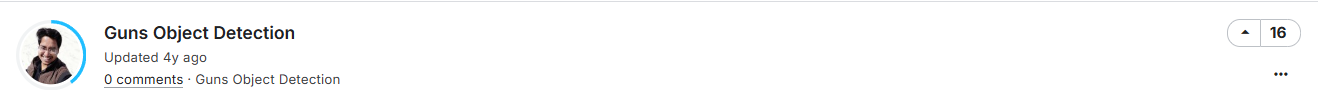

In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.image import resize_with_pad
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Dropout, LeakyReLU, MaxPooling2D, UpSampling2D

In [6]:
main_path = r"D:\code_study\ML_CODE\dataSets\ObjectDetection\Guns_Object_Detection\archive"
main_path = main_path.replace("\\", "/")
BASE_IMAGE_PATH = main_path + '/Images'
BASE_LABELS_PATH = main_path + '/Labels'
TARGET_IMAGE_SIZE = (256, 256)
LEARNING_RATE = 0.0001
BATCH_SIZE = 16
EPOCHS = 50
VAL_SPLIT = 0.2

In [8]:
image_data = []
image_labels = []

image_count = len(os.listdir(BASE_IMAGE_PATH))

for i in range(1, image_count + 1):
    img = load_img(os.path.join(BASE_IMAGE_PATH, str(i) + '.jpeg'))
    img = img_to_array(img, dtype = 'uint8')
    image_data.append(img)
    
    label_mask = np.zeros((*img.shape[:2], 1))
    
    with open(os.path.join(BASE_LABELS_PATH, str(i) + '.txt'), 'r') as label_file:
        l_count = int(label_file.readline())
        
        for i in range(l_count):
            box = list(map(int, label_file.readline().split()))
            label_mask[box[1]:box[3], box[0]:box[2]] = 1.0
        
    image_labels.append(label_mask)

TypeError: Invalid shape (165, 305, 1) for image data

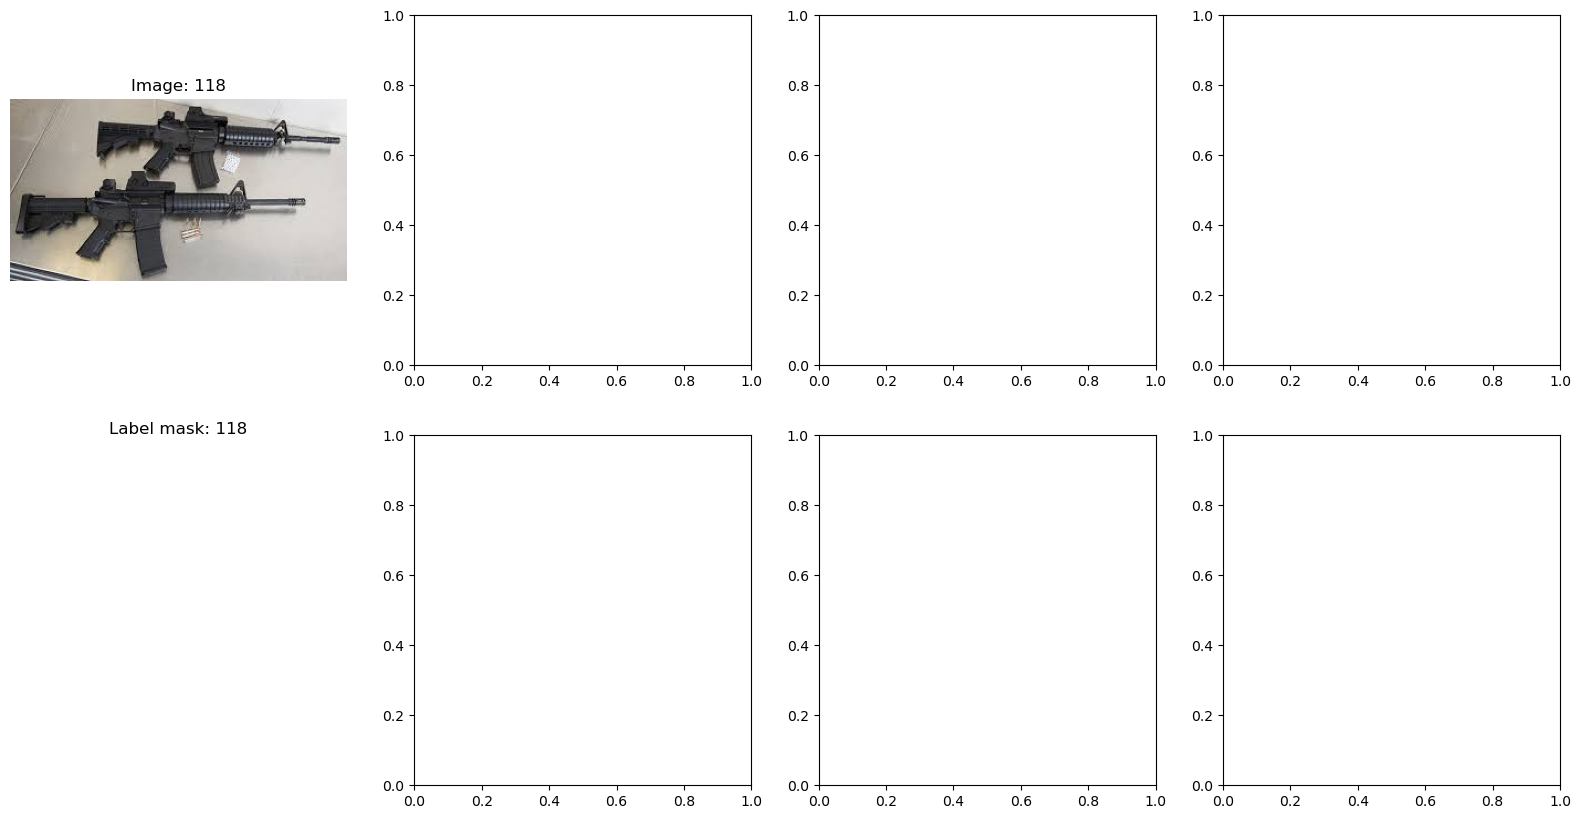

In [ ]:
plt.subplots(nrows = 2, ncols = 4, figsize = (20, 10))

for i, img_index in enumerate(np.random.randint(0, image_count, size = 4)):
    plt.subplot(2, 4, i + 1)
    plt.axis(False)
    plt.grid(False)
    plt.title(f'Image: {img_index}')
    plt.imshow(image_data[img_index])
    
    plt.subplot(2, 4, i + 5)
    plt.axis(False)
    plt.grid(False)
    plt.title(f'Label mask: {img_index}')
    label_mask = np.squeeze(image_labels[img_index], axis=-1)
    plt.imshow(label_mask, cmap = 'gray')
plt.show()